# Introduction

In this project, a clustering analysis of each country's development will be conducted. In this fictional scenario, HELP International has been able to raise around $10 million. Now, the CEO of the NGO needs to decide how to use this money strategically and effectively. Therefore, the CEO must make a decision to select the countries that are in the most urgent need of aid.

# Objective

Categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then suggest the countries which the CEO needs to focus on the most.

# pip's

In [1]:
!pip install sweetviz
!pip install pycountry
!pip install pycountry-convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.7/234.7 kB 2.3 MB/s eta 0:00:00


# Data Load

In [2]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import pycountry
import pycountry_convert as pc
import plotly.express as px

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

In [3]:
URL = "https://raw.githubusercontent.com/Andre647/CountryDevelopment/refs/heads/main/data/Country-data.csv"
df = pd.read_csv(URL)
print(f'shape: {df.shape}')
df.head()

shape: (167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# EDA

## Data Understanding

In [4]:
dic = pd.read_csv("https://raw.githubusercontent.com/Andre647/CountryDevelopment/refs/heads/main/data/data-dictionary.csv")

In [5]:
for index, row in dic.iterrows():
  print(f"{row['Column Name']}: {row['Description']}")

country: Name of the country
child_mort: Death of children under 5 years of age per 1000 live births
exports: Exports of goods and services per capita. Given as %age of the GDP per capita
health: Total health spending per capita. Given as %age of GDP per capita
imports: Imports of goods and services per capita. Given as %age of the GDP per capita
Income: Net income per person
Inflation: The measurement of the annual growth rate of the Total GDP
life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
total_fer: The number of children that would be born to each woman if the current age-fertility rates remain the same.
gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Data Vis

                                             |          | [  0%]   00:00 -> (? left)


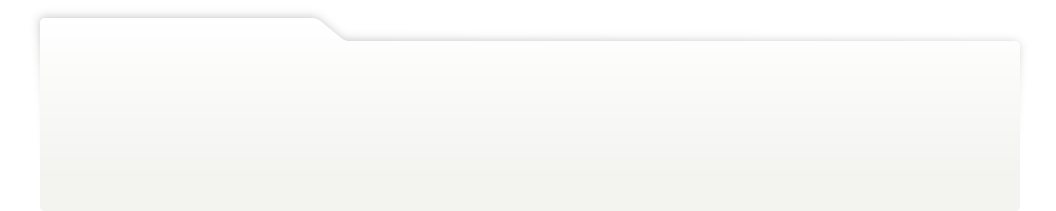
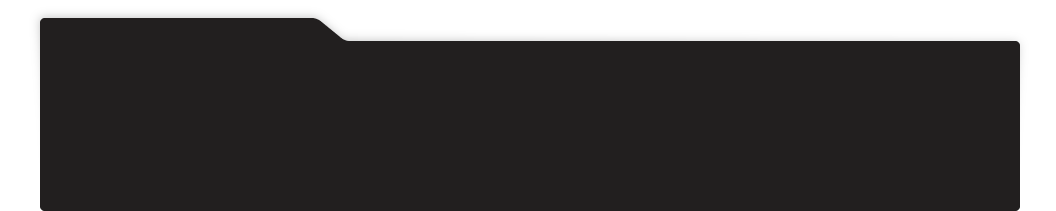
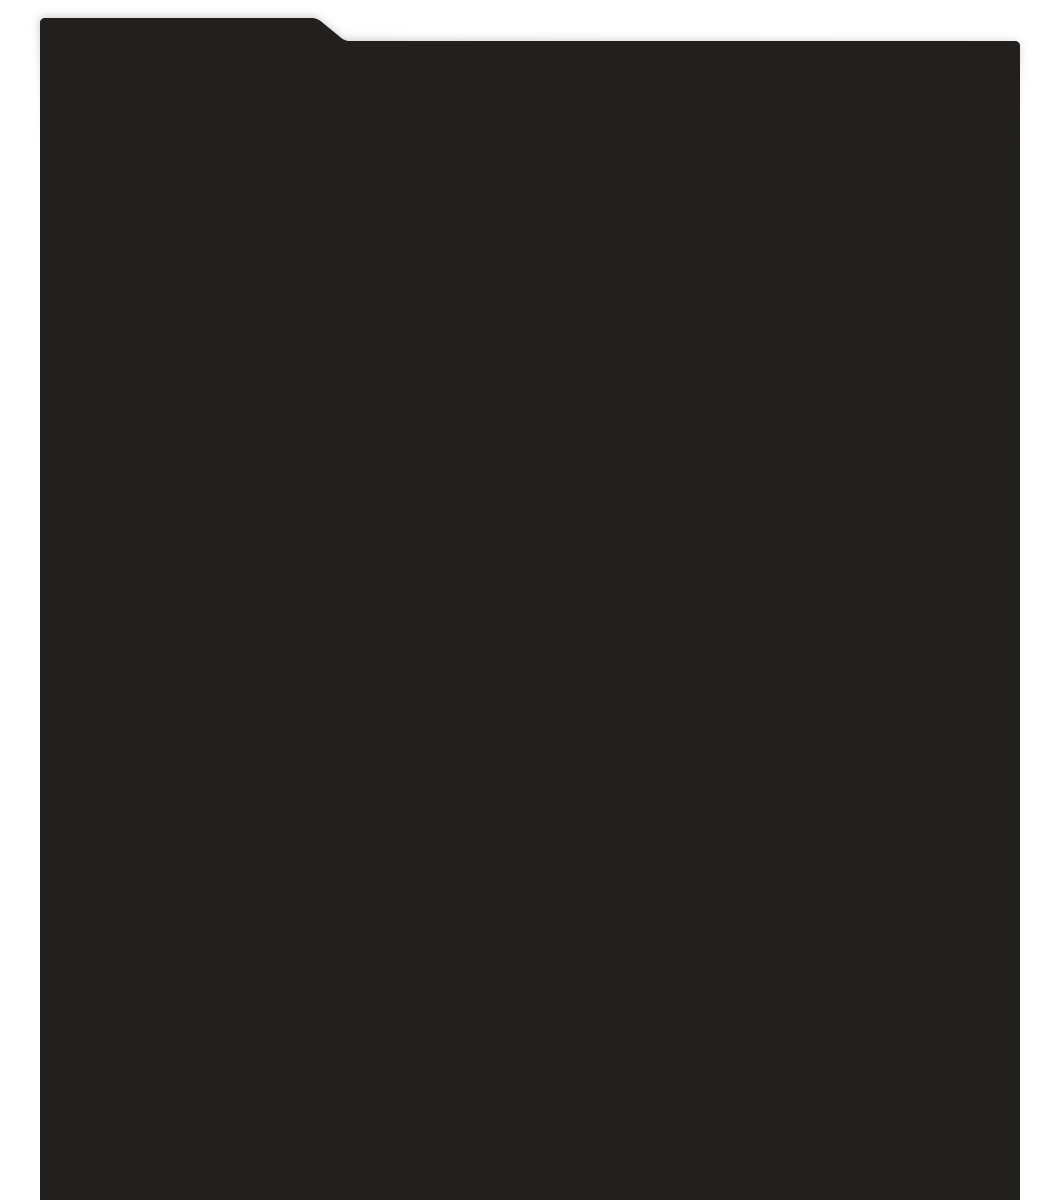
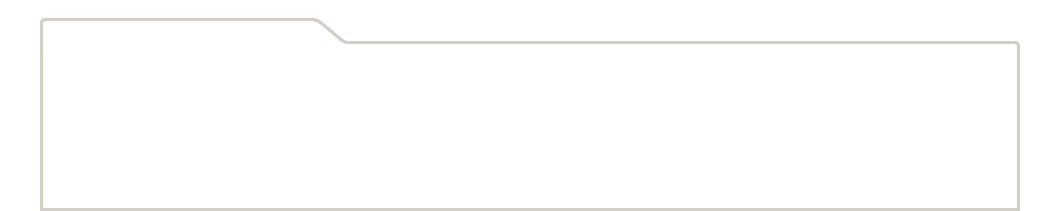
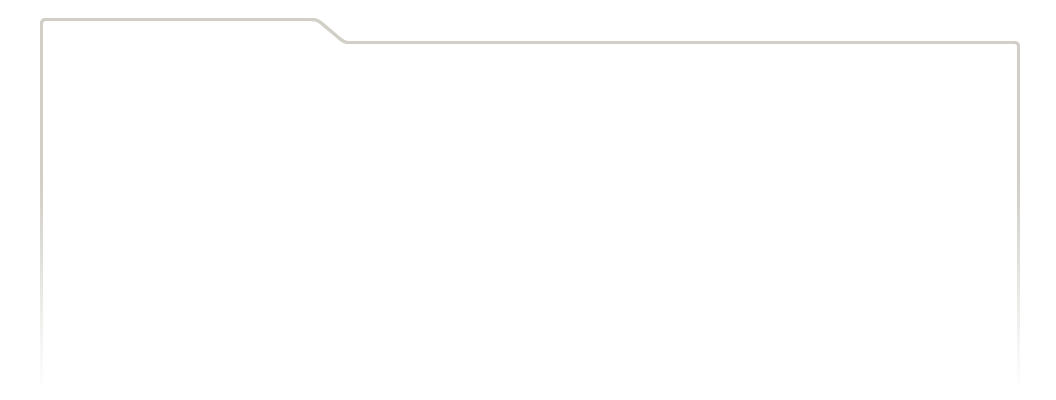
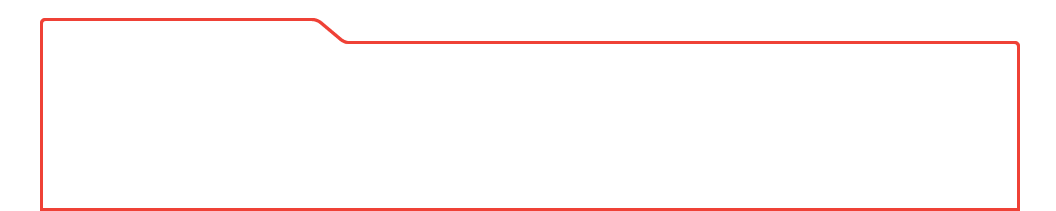
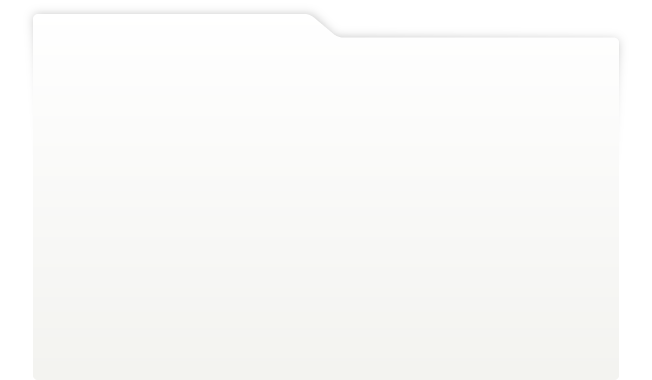
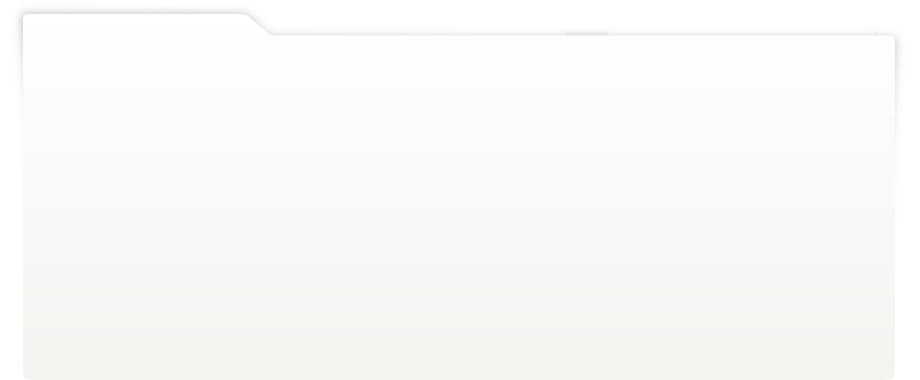
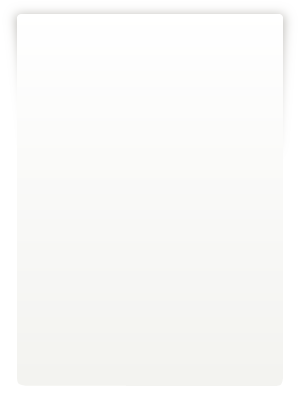
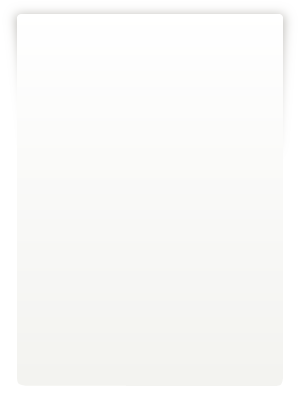
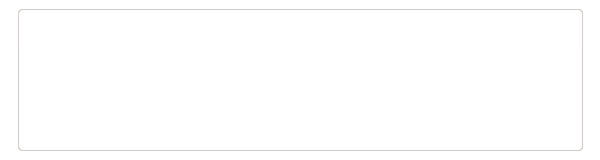
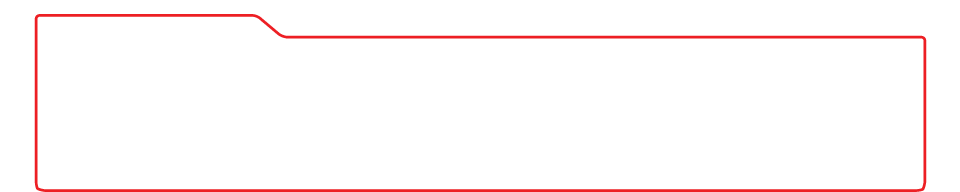
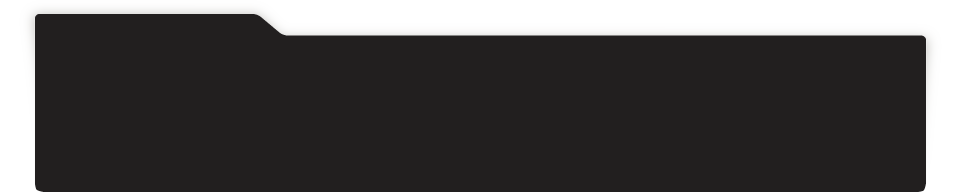
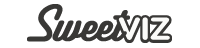
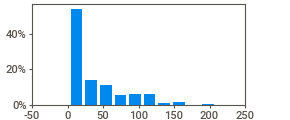
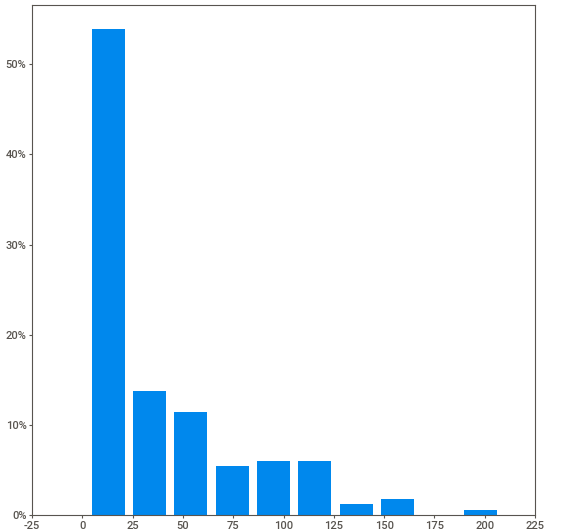
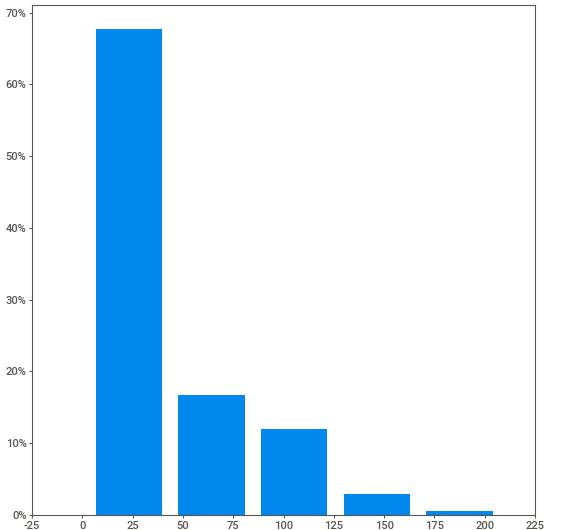
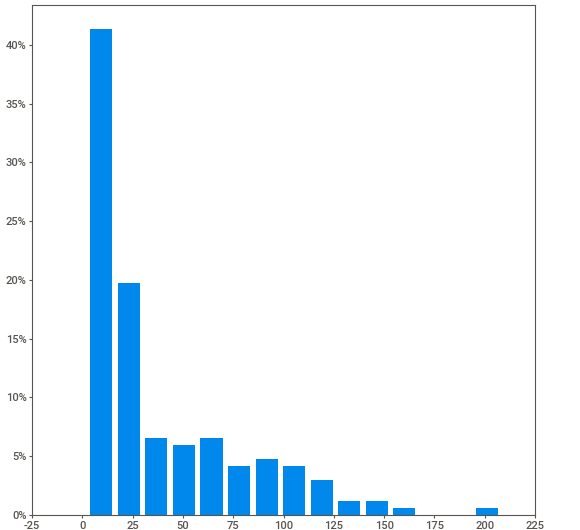
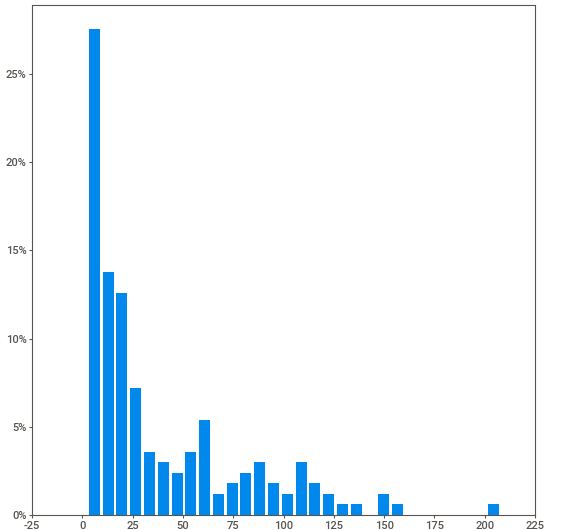
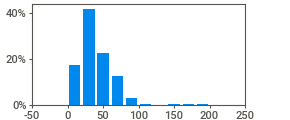
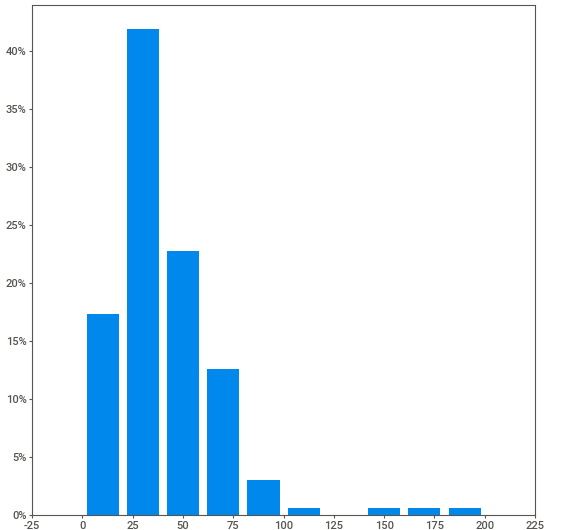
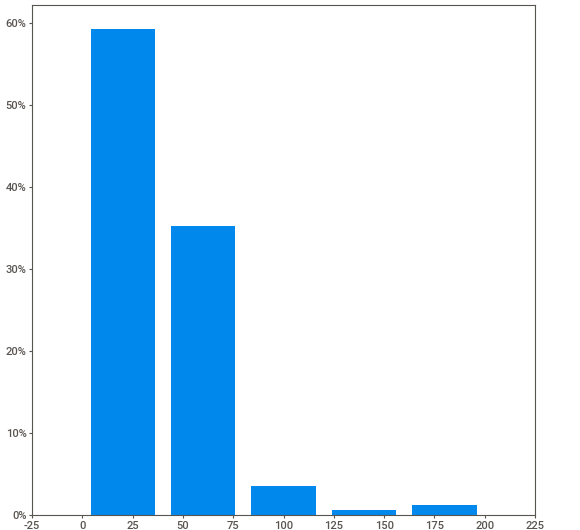
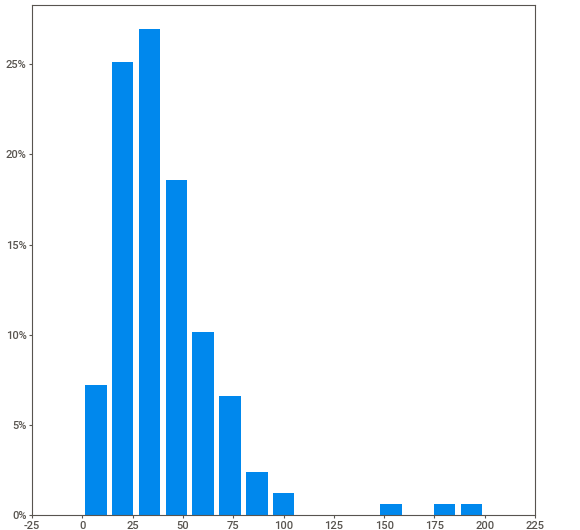
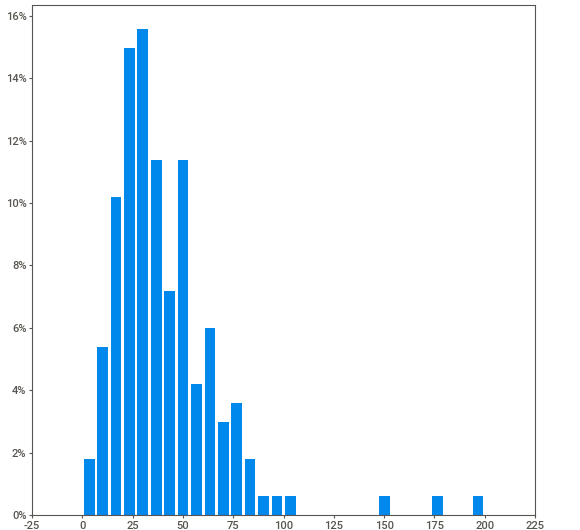
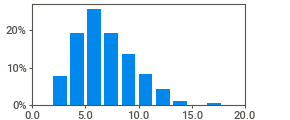
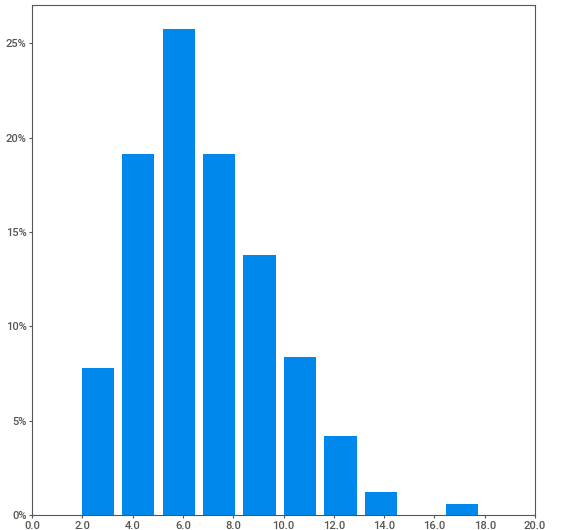
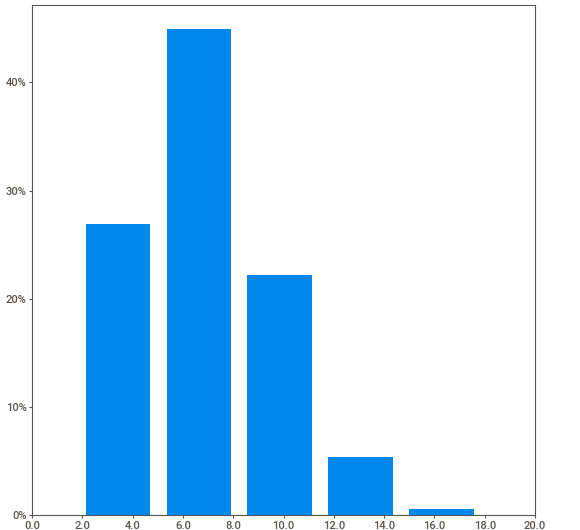
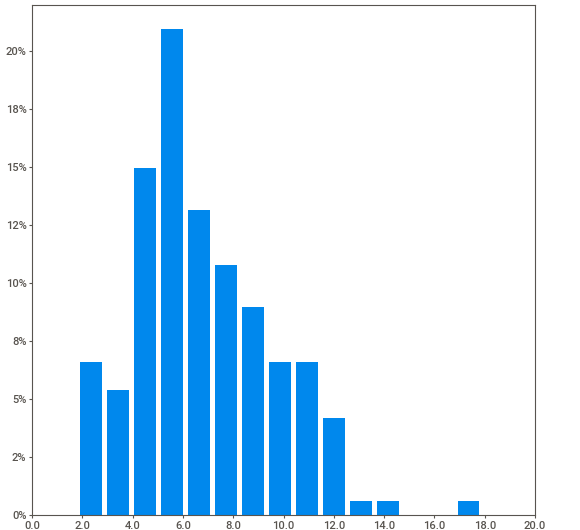
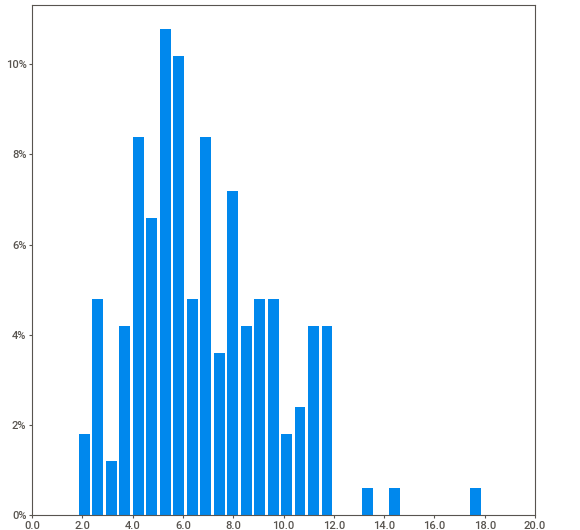
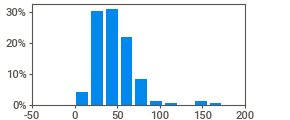
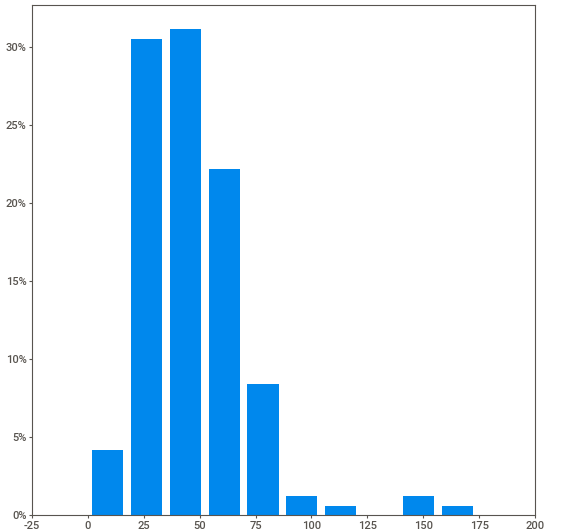
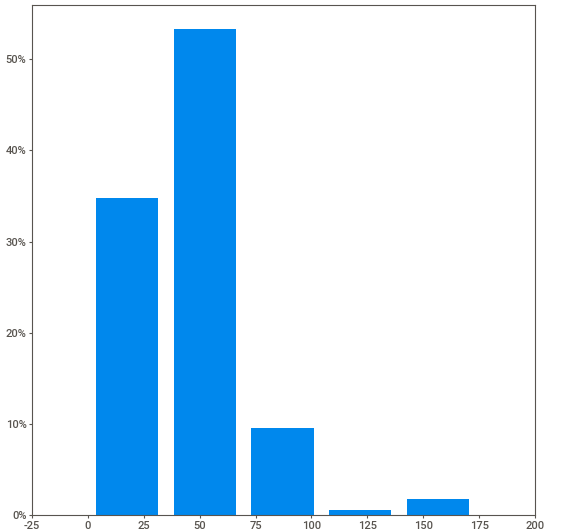
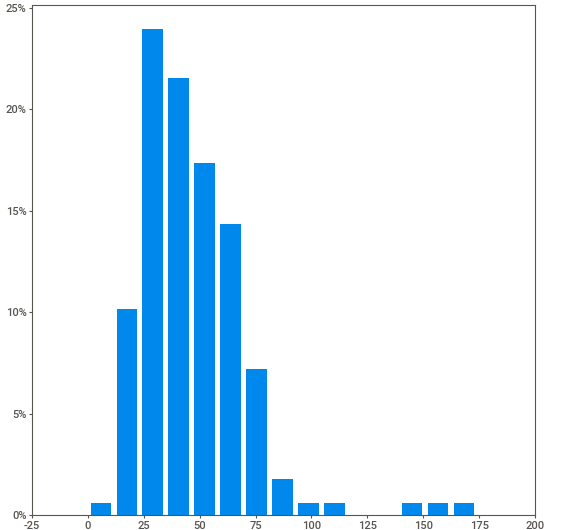
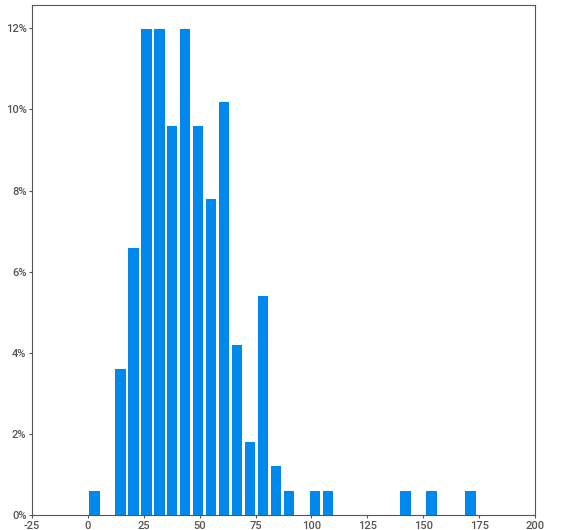
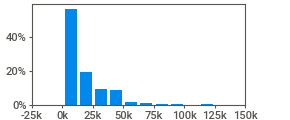
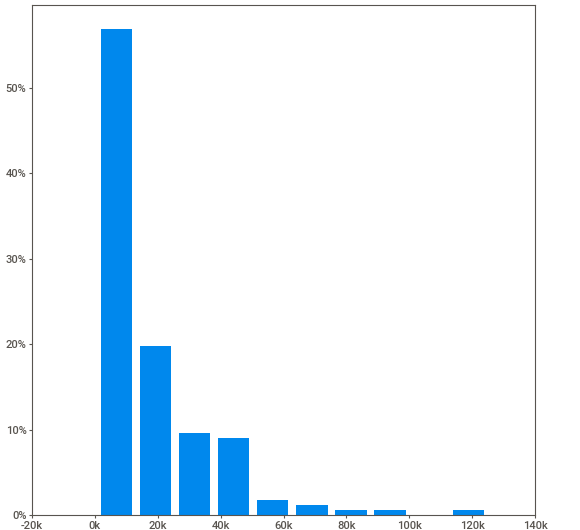
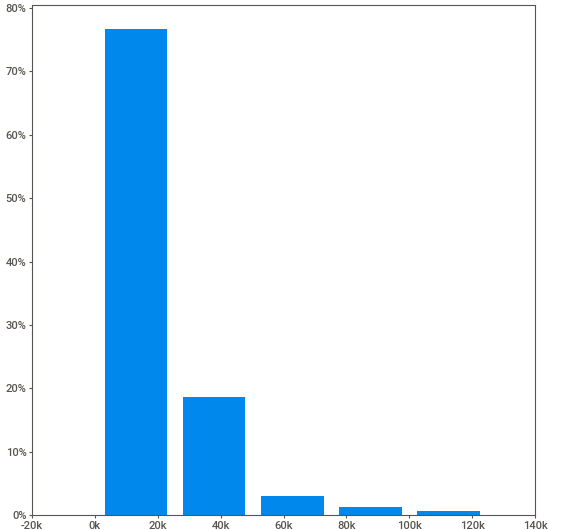
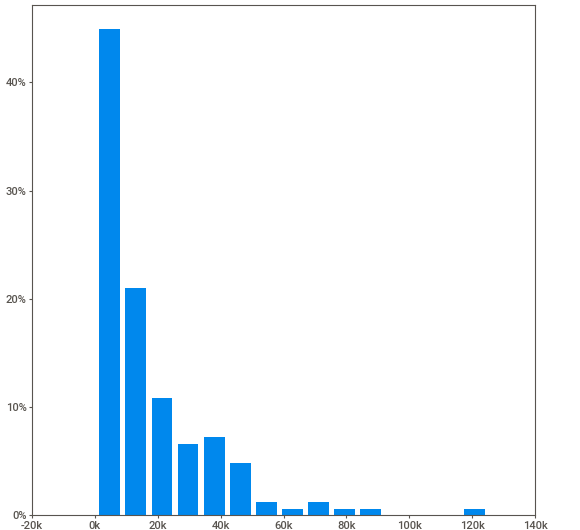
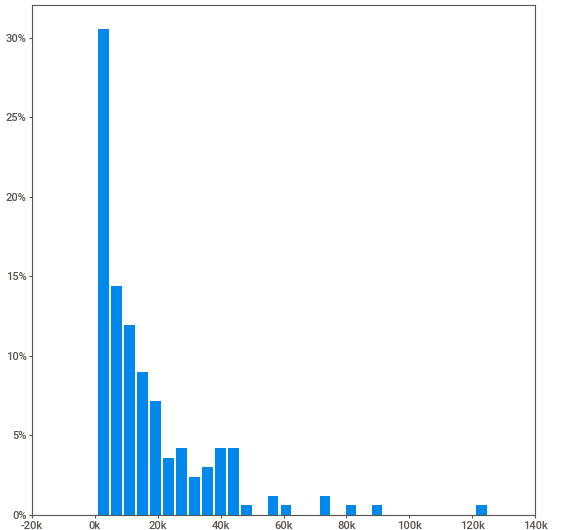
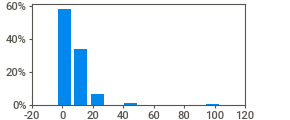
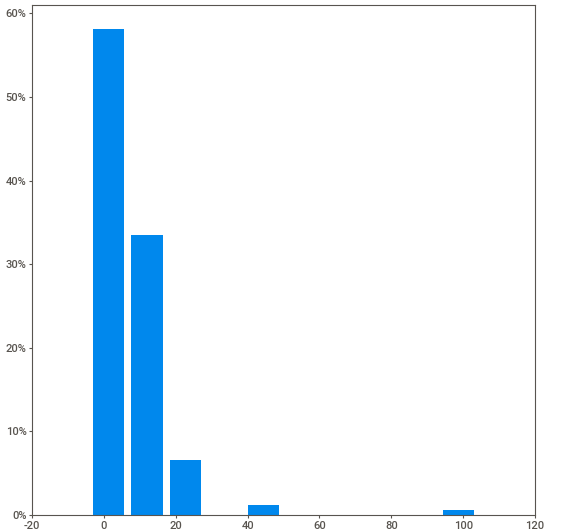
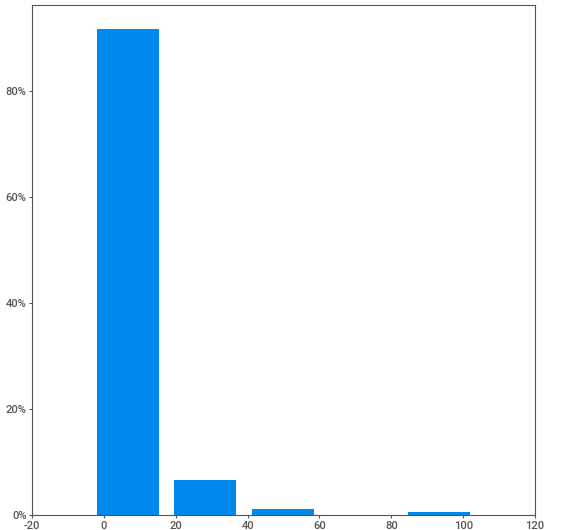
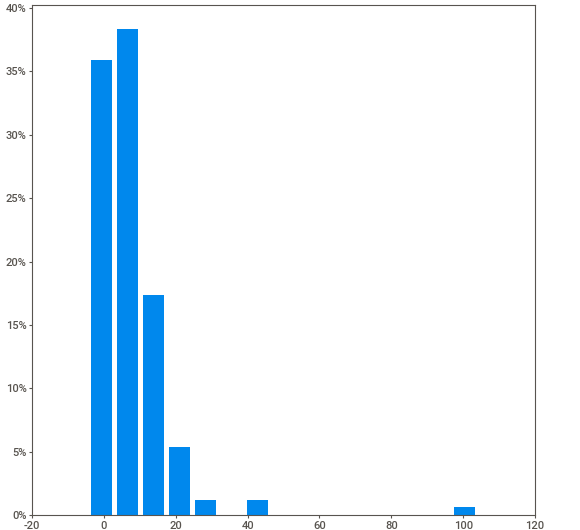
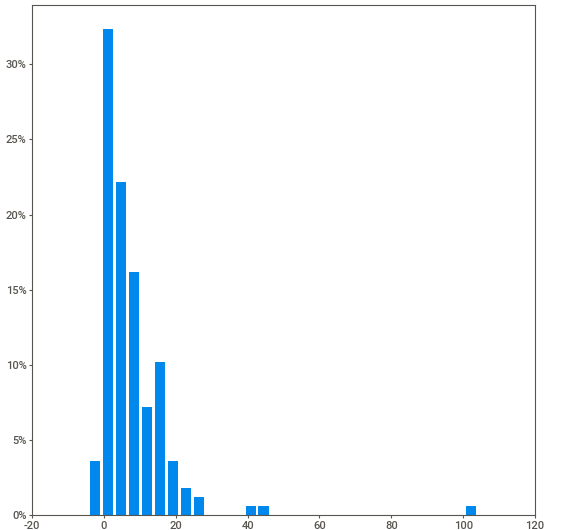
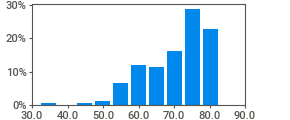
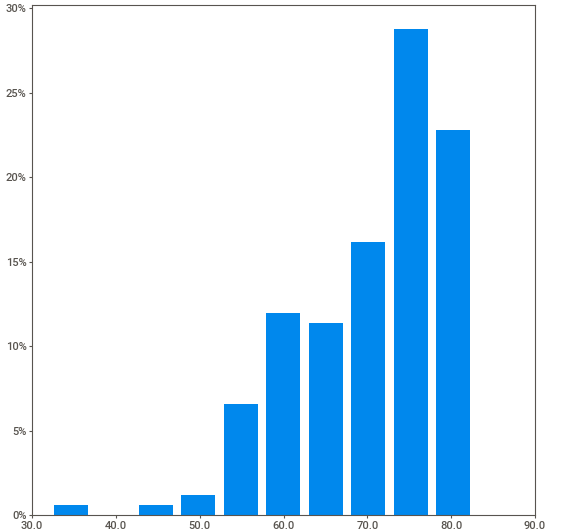
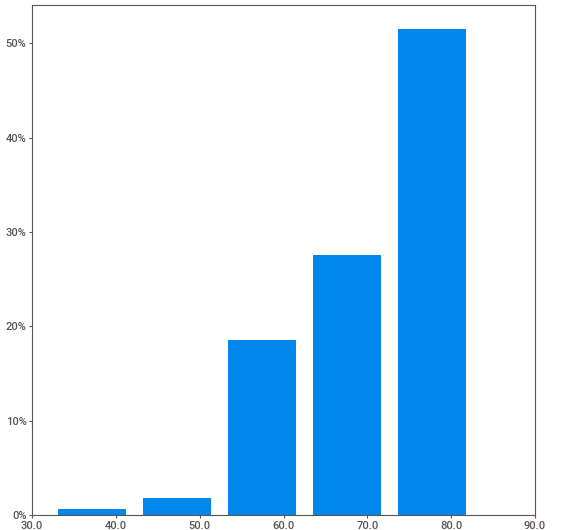
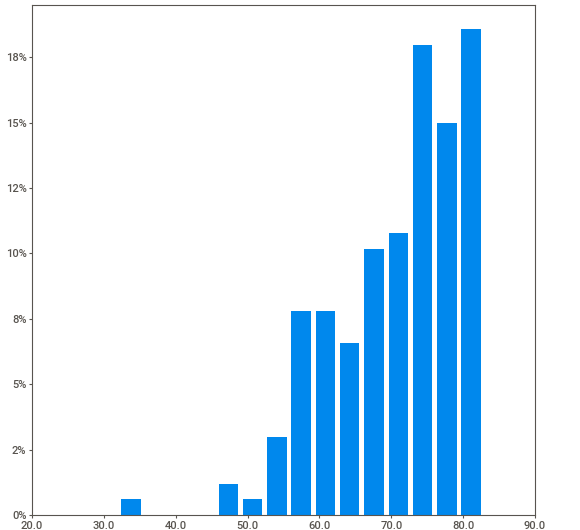
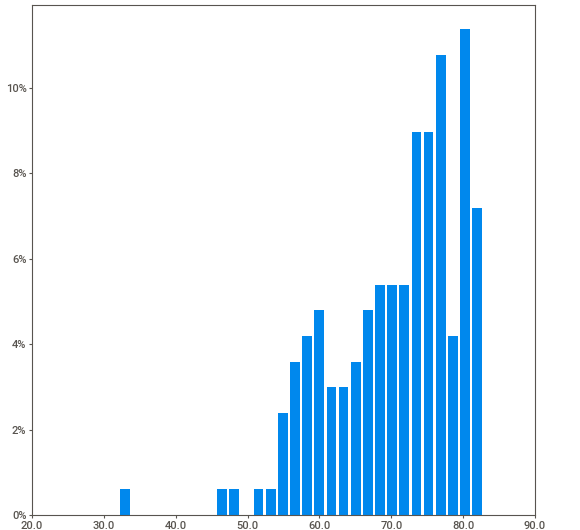
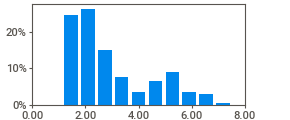
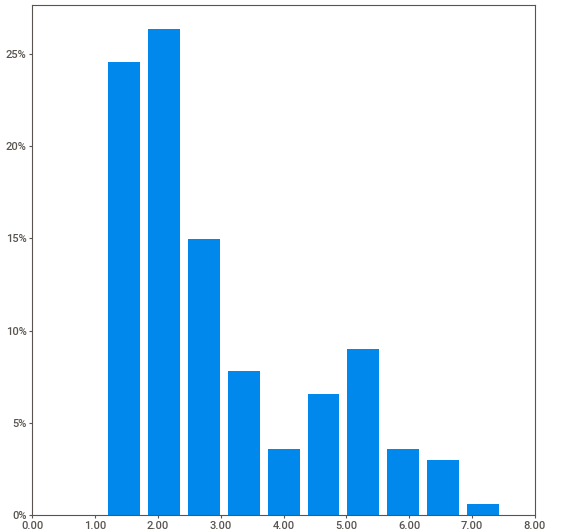
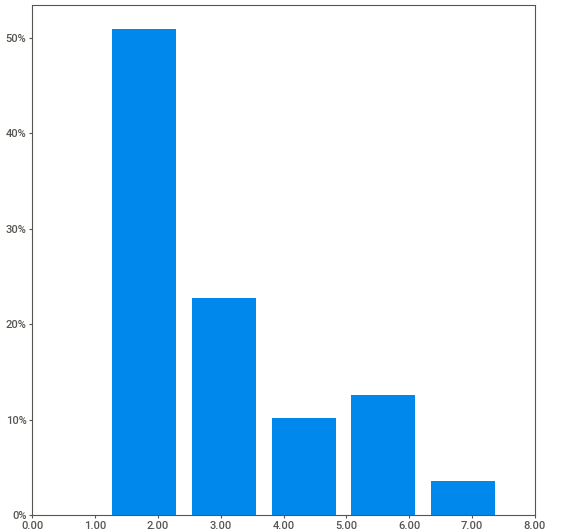
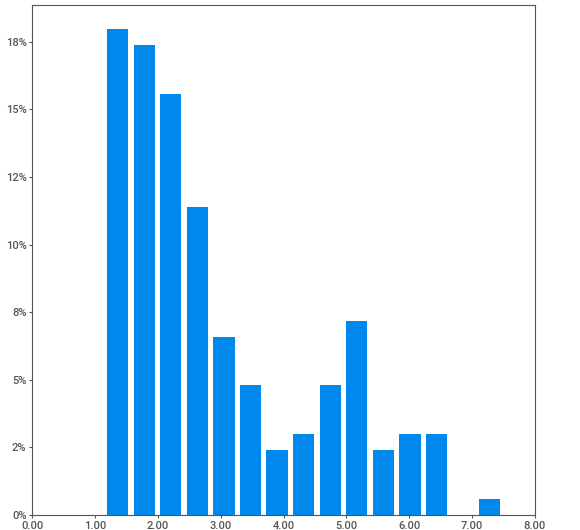
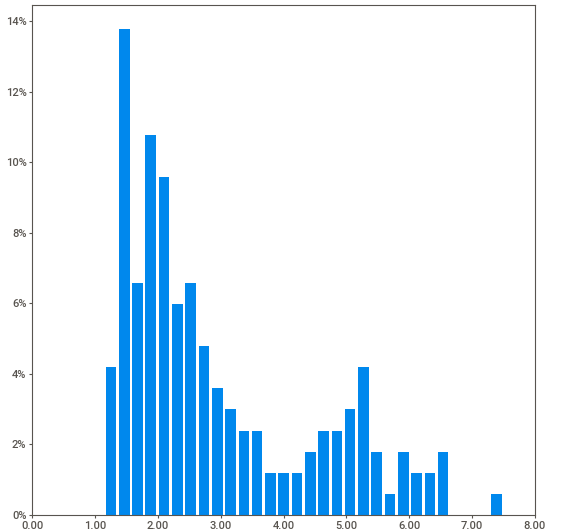
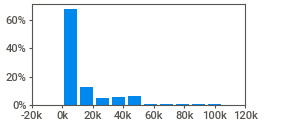
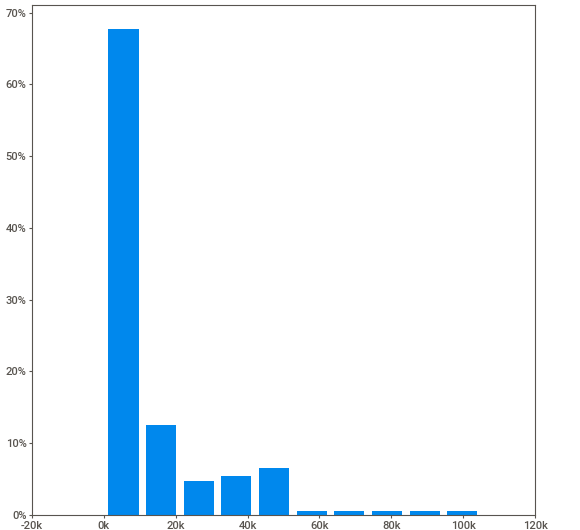
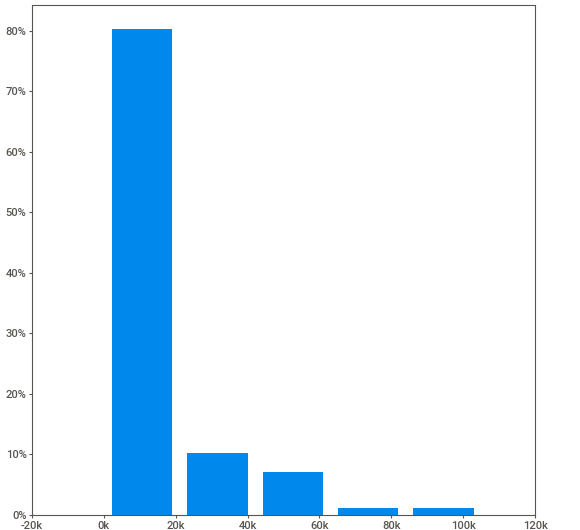
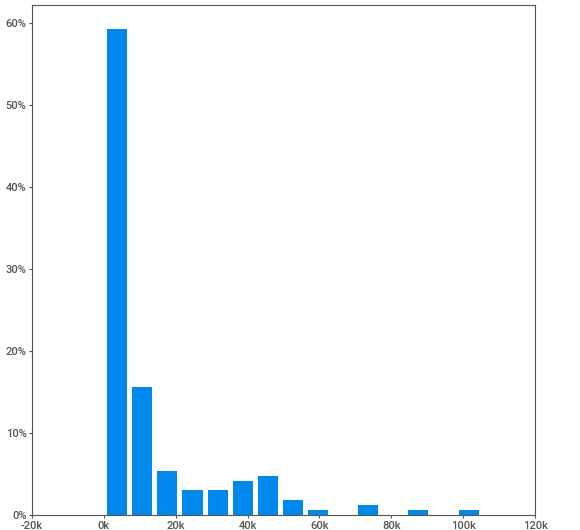
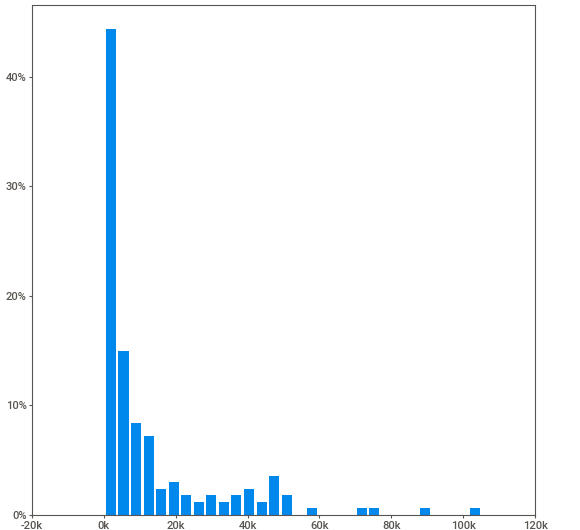
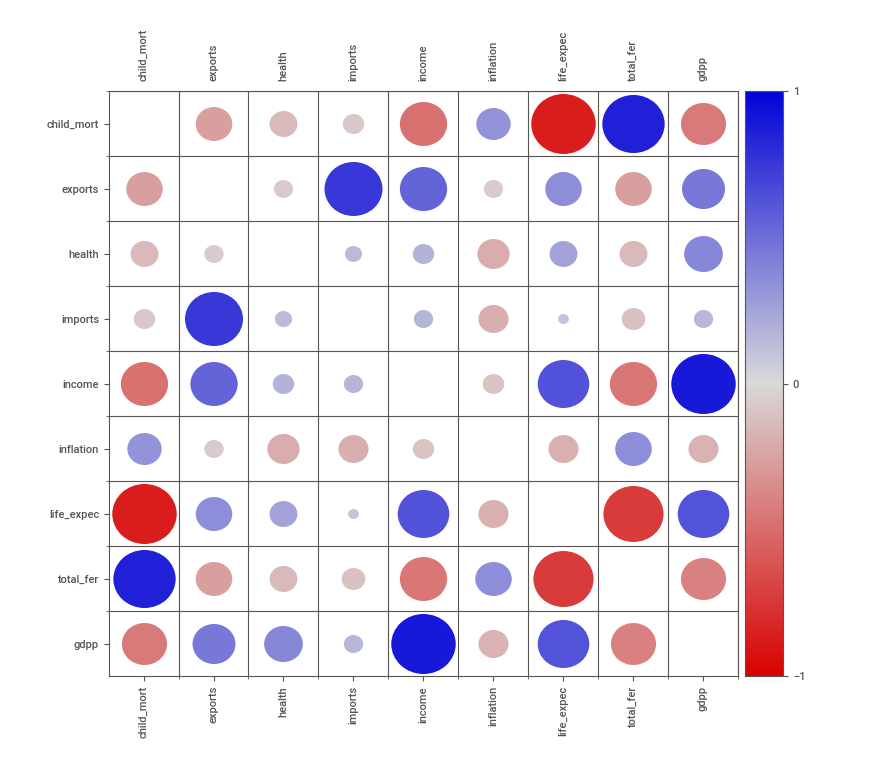
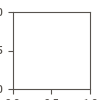

In [8]:
my_report = sv.analyze(df)
my_report.show_notebook()

### Child Mortality

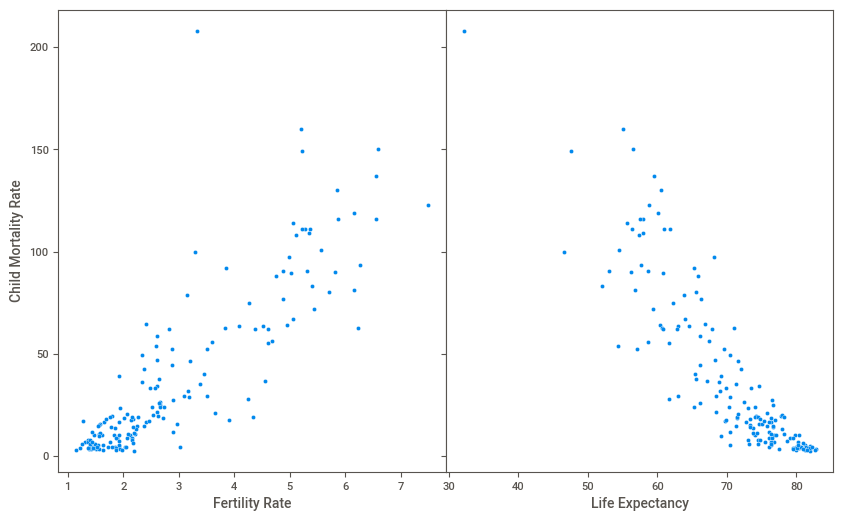

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

sns.scatterplot(x='total_fer', y='child_mort', data=df, ax=ax[0])
ax[0].set_xlabel('Fertility Rate')
ax[0].set_ylabel('Child Mortality Rate')

sns.scatterplot(x='life_expec', y='child_mort', data=df, ax=ax[1])
ax[1].set_xlabel('Life Expectancy')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

### Income

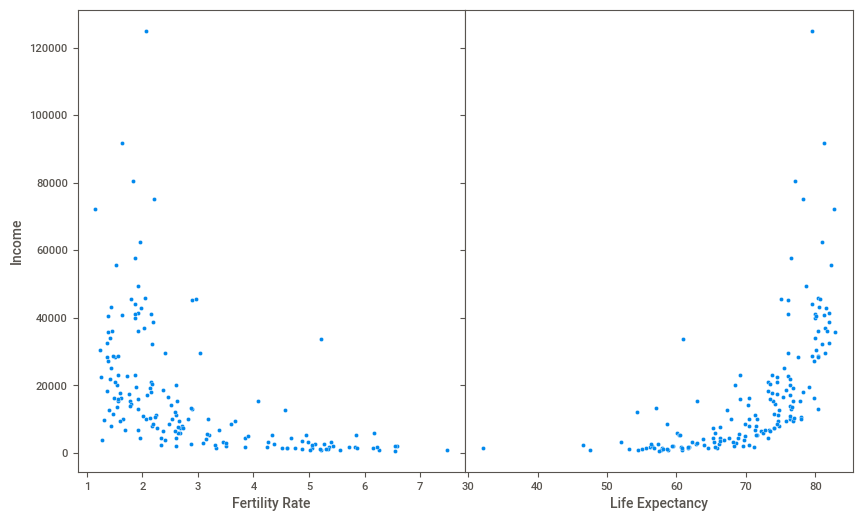

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

sns.scatterplot(x='total_fer', y='income', data=df, ax=ax[0])
ax[0].set_xlabel('Fertility Rate')
ax[0].set_ylabel('Income')

sns.scatterplot(x='life_expec', y='income', data=df, ax=ax[1])
ax[1].set_xlabel('Life Expectancy')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

We could create several different charts, what can be analyzed is that a country's **income** significantly affects important factors when considering it as developed, such as **life expectancy**. Another obvious factor we can observe is that the infant mortality rate increases along with the fertility rate, while life expectancy, in turn, decreases.

### Continents

In [13]:
warnings.filterwarnings("ignore")

In [14]:
def country_to_continent(CountryName):
    try:
        country_code = pc.country_name_to_country_alpha2(
            CountryName, cn_name_format="default"
        )
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)

        return continent_name

    except Exception:
        return np.nan

In [15]:
df['continent'] = df['country'].apply(country_to_continent)

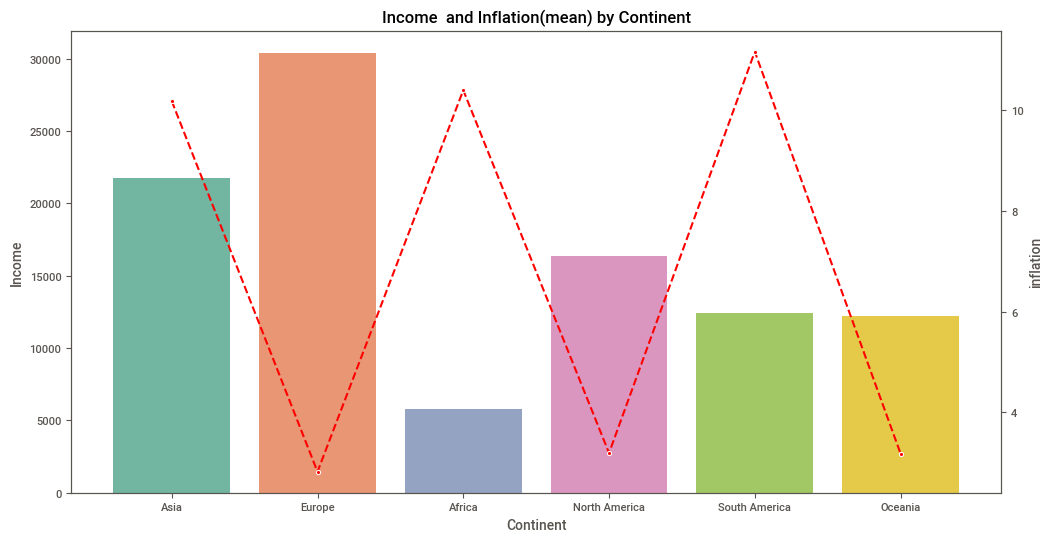

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

sns.barplot(
    x='continent', y='income',
    palette='Set2',
    ci=None,
    ax=ax,
    data=df
)

ax2 = ax.twinx()

sns.lineplot(
    x='continent', y='inflation',
    data=df, color='red',
    ax=ax2, marker='o',
    linestyle='--', ci=None
)

ax.set_title('Income  and Inflation(mean) by Continent')
ax.set_xlabel('Continent')
ax.set_ylabel('Income')

plt.show()

In [18]:
def country_to_isocode(country):
    try:
        return pycountry.countries.get(name=country).alpha_3
    except Exception:
        return np.nan


df['ISO_code'] = df['country'].apply(country_to_isocode)

In [19]:
fig = px.choropleth(
    df,
    locations="ISO_code",
    color='income',
    hover_data=["continent", "country", 'income'],
    height=500,
    color_continuous_scale=px.colors.sequential.Emrld
)

fig.update_layout(
    title={
        'text': '<b>Distribution of Income on the World Map</b>',
        'font': {'size': 20, 'color': 'black'}
    }
)

fig.update_xaxes(tickfont_family="Arial Black")
fig.show()

In [20]:
fig = px.choropleth(
    df,
    locations="ISO_code",
    color='inflation',
    hover_data=["continent", "country", 'inflation'],
    height=500,
    color_continuous_scale=px.colors.sequential.Rainbow
)

fig.update_layout(
    title={
        'text': '<b>Distribution of Inflation on the World Map</b>',
        'font': {'size': 20, 'color': 'black'}
    }
)

fig.update_xaxes(tickfont_family="Arial Black")
fig.show()

Analyzing the inflation and income of countries and continents, we can reach interesting conclusions:

* Europe leads in income flow and has the lowest inflation, while Asia, although closely behind, has considerable inflation, likely due to the high inflation rate in Mongolia, although China's is not that low either.

* Africa has an extremely low income flow combined with high inflation, only lower than that of South America, which certainly affects the continent's development and the cluster we will perform.

* Despite not having the highest median, South America has the highest average inflation.



# Model

In [21]:
mdata = df.drop(columns=['country', 'ISO_code', 'continent'])

In [22]:
mdata.corr() > 0.9

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,True,False,False,False,False,False,False,False,False
exports,False,True,False,False,False,False,False,False,False
health,False,False,True,False,False,False,False,False,False
imports,False,False,False,True,False,False,False,False,False
income,False,False,False,False,True,False,False,False,False
inflation,False,False,False,False,False,True,False,False,False
life_expec,False,False,False,False,False,False,True,False,False
total_fer,False,False,False,False,False,False,False,True,False
gdpp,False,False,False,False,False,False,False,False,True


## Normalization

In [23]:
scaler = StandardScaler()
scaler.fit(mdata)

mdata_scaled = scaler.transform(mdata)
mdata = pd.DataFrame(mdata_scaled, columns=mdata.columns)

mdata.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Clusters

### Dendogram

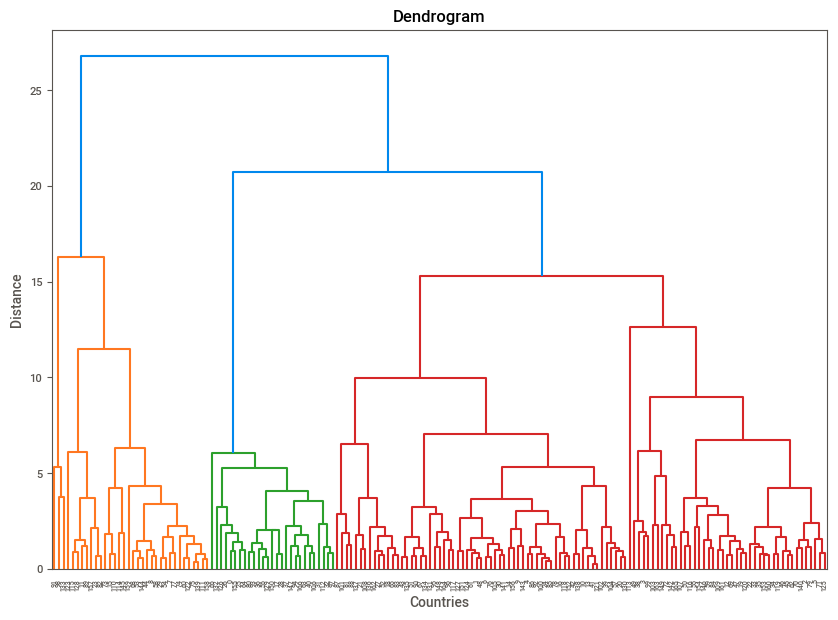

In [24]:
plt.figure(figsize=(10, 7))
Z = linkage(mdata, method='ward')
dendrogram(Z)

plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Distance')

plt.show()

### Elbow Method

Text(0.5, 1.0, 'Elbow Method')

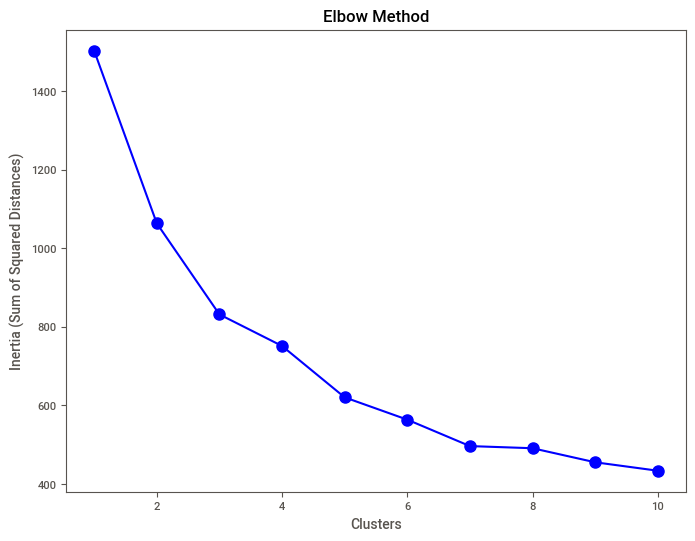

In [25]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(mdata)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method')

The dendrogram provides us with an ideal number of **3 clusters**, while the elbow method seems to indicate that both 3 and 4 could work. We will perform both and check the results.

### Agglomerative Clustering

The agglomerative model is less sensitive to outliers than K-Means. Since we are not concerned about performance here, it is a more robust model to use.

In [26]:
agg_clust = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)
df['Cluster(3)'] = agg_clust.fit_predict(mdata)

## Results

In [27]:
df['Cluster(3)'].loc[df['Cluster(3)'] == 0] = 'No Help Needed'
df['Cluster(3)'].loc[df['Cluster(3)'] == 2] = 'Help Needed'
df['Cluster(3)'].loc[df['Cluster(3)'] == 1] = 'Might Need Help'

In [28]:
fig = px.choropleth(
    df,
    locations="ISO_code",
    color='Cluster(3)',
    hover_data=["continent", "country", 'Cluster(3)'],
    height=500,
    color_discrete_map = {'Help Needed':'Red',
                          'No Help Needed':'Green',
                           'Might Need Help':'Yellow'}
                   )


fig.update_layout(
    title={
        'text': '<b>Clusters in the World Map</b>',
        'font': {'size': 20, 'color': 'black'}
    }
)
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_xaxes(tickfont_family="Arial Black")
fig.show()


In [29]:
agg_clust = AgglomerativeClustering(
    n_clusters=4,
    linkage='ward'
)
df['Cluster(4)'] = agg_clust.fit_predict(mdata)

In [30]:
df['Cluster(4)'].value_counts()

,count
Cluster(4),
0,106
1,31
2,27
3,3


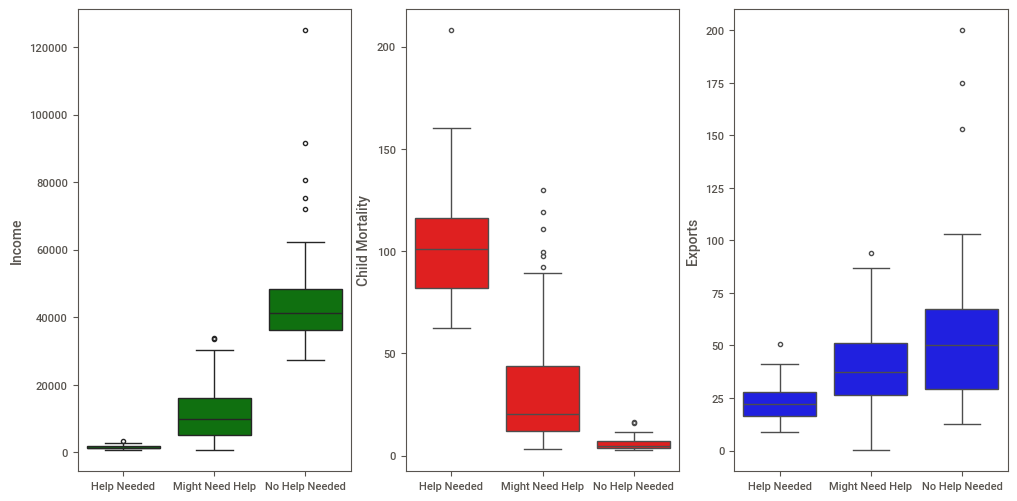

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6), sharex=True)

sns.boxplot(x='Cluster(3)', y='income', color='Green',data=df, ax=ax[0])
ax[0].set_ylabel('Income')
ax[0].set_xlabel('')

sns.boxplot(x='Cluster(3)', y='child_mort', color='Red',data=df, ax=ax[1])
ax[1].set_ylabel('Child Mortality')
ax[1].set_xlabel('')

sns.boxplot(x='Cluster(3)', y='exports', color='Blue',data=df, ax=ax[2])
ax[2].set_ylabel('Exports')
ax[2].set_xlabel('')
plt.show()

# Conclusion



* We can visualize that the countries in need of the most help are located on the African continent, specifically those centralized and near the Sahara Desert.
* The algorithm placed several Asian countries in the same cluster as countries from South America, as well as Eastern Europe.
* Haiti and Afghanistan are the only countries in extreme need that do not share a border with another country in the same cluster.
* Income and infant mortality are strong indicators of a country's development.
* 4 clusters was not ideal for the problem

(The data was collected in 2020 and does not reflect the current economic situation as of the time this notebook was created (2024).)

